#Load data

Pertama-tama, dataset MNIST diambil dari library TensorFlow. Dataset ini dibagi menjadi dua bagian: training data dan testing data. Training data digunakan untuk melatih model, sementara testing data digunakan untuk mengevaluasi performa model.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split


In [ ]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


Data gambar diubah menjadi bentuk yang sesuai dengan input model, yaitu (28, 28, 1), di mana 1 menunjukkan bahwa gambar tersebut memiliki satu saluran warna (grayscale). Data juga dinormalisasi dengan membagi nilai piksel dengan 255, sehingga mempercepat konvergensi selama pelatihan.

Selain itu, label dari dataset MNIST diubah menjadi format one-hot encoding, di mana setiap label digit (0-9) diubah menjadi vektor biner dengan panjang 10. Misalnya, angka 3 akan dikonversi menjadi vektor [0, 0, 0, 1, 0, 0, 0, 0, 0, 0].

In [ ]:

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

Model deep learning yang digunakan adalah model Sequential sederhana dari Keras. Model ini terdiri dari beberapa lapisan dasar:
1. Convolutional Layers: Untuk mengekstrak fitur dari gambar.
2. MaxPooling Layers: Untuk mengurangi dimensi gambar secara efektif, tanpa kehilangan informasi penting.
3. Flatten Layer: Untuk meratakan hasil dari lapisan convolutional menjadi vektor satu dimensi.
4. Dense Layers: Lapisan fully connected yang melakukan klasifikasi berdasarkan fitur yang diekstrak. Lapisan akhir menggunakan aktivasi softmax untuk menghasilkan probabilitas untuk setiap kelas (digit 0-9).

Model ini dilatih menggunakan optimizer Adam dan loss function categorical crossentropy karena ini adalah masalah klasifikasi dengan lebih dari dua kelas. Model dilatih selama beberapa epoch hingga mencapai akurasi yang diinginkan, yaitu di atas 70% untuk data training dan validasi.

In [ ]:

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=128,
                    validation_data=(x_val, y_val))


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 48s 123ms/step - accuracy: 0.8315 - loss: 0.5979 - val_accuracy: 0.9751 - val_loss: 0.0855
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 50s 134ms/step - accuracy: 0.9752 - loss: 0.0834 - val_accuracy: 0.9747 - val_loss: 0.0828
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 131ms/step - accuracy: 0.9822 - loss: 0.0578 - val_accuracy: 0.9862 - val_loss: 0.0482
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 130ms/step - accuracy: 0.9876 - loss: 0.0411 - val_accuracy: 0.9862 - val_loss: 0.0450
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 127ms/step - accuracy: 0.9910 - loss: 0.0303 - val_accuracy: 0.9861 - val_loss: 0.0455
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 125ms/step - accuracy: 0.9923 - loss: 0.0244 - val_accuracy: 0.9888 - val_loss: 0.0402
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 124ms/step - accuracy: 0.9948 - loss: 0.0186 - val_accuracy: 0.9876 - val_loss: 0.0425
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 46s 123ms/step - accuracy: 0.9948 - loss: 0

In [ ]:

test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"Test accuracy: {test_acc*100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9838 - loss: 0.0502
Test accuracy: 98.77%


Setelah pelatihan selesai, model dievaluasi menggunakan data testing yang belum pernah dilihat oleh model. Akurasi dan loss dari model dihitung untuk mengukur seberapa baik model dapat menggeneralisasi pada data baru yang tidak digunakan selama pelatihan.

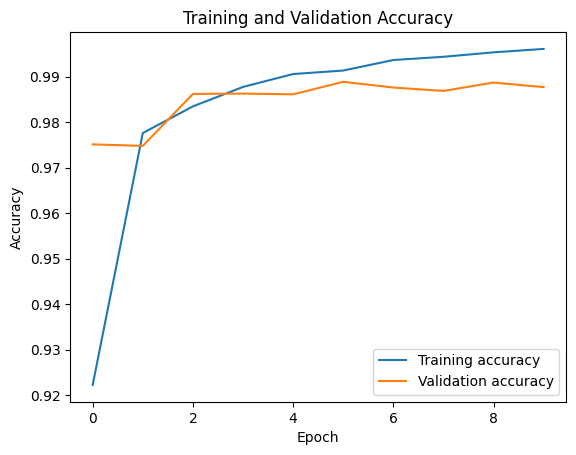

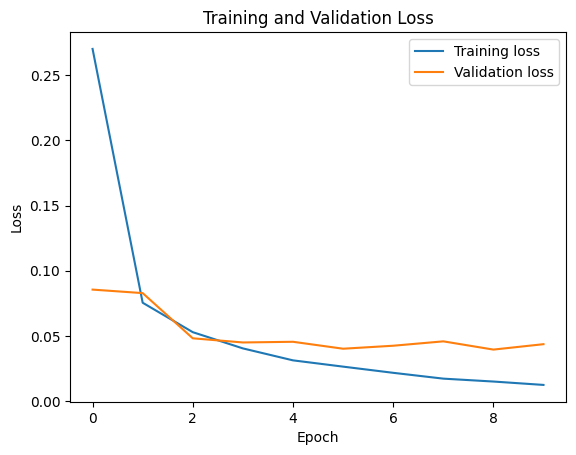

In [ ]:

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Setelah model berhasil dilatih dengan akurasi yang memadai, model tersebut disimpan menggunakan fungsi model.save() ke dalam file model_mnist.h5. Ini memungkinkan kita untuk menggunakan model tanpa harus melatih ulang dari awal setiap kali kita ingin melakukan prediksi.

Ketika model ingin digunakan, kita bisa memuatnya kembali dengan menggunakan`model.load_model(). Ini menghemat waktu dan sumber daya, terutama saat bekerja dengan dataset besar.

In [ ]:
import numpy as np

prediksi = model.predict(x_test[:5])

prediksi_persen = np.round(prediksi * 100, 2)

nilai_sebenarnya = np.argmax(y_test[:5], axis=1)

# Tampilkan hasil prediksi dalam format persentase
print('=====          Prediksi Angka (0-9)             ========')
print('====\t0\t1\t2\t3\t4\t5\t6\t7\t8\t9\t====|\t Nilai Sebenarnya')

for i in range(len(prediksi_persen)):
    prediksi_formatted = [f"{percent:.2f}%" for percent in prediksi_persen[i]]
    print(f"Prediksi %: {prediksi_formatted} | Nilai Sebenarnya: {nilai_sebenarnya[i]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
=====          Prediksi Angka (0-9)             ========
====	0	1	2	3	4	5	6	7	8	9	====|	 Nilai Sebenarnya
Prediksi %: ['0.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%', '100.00%', '0.00%', '0.00%'] | Nilai Sebenarnya: 7
Prediksi %: ['0.00%', '0.00%', '100.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%'] | Nilai Sebenarnya: 2
Prediksi %: ['0.00%', '100.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%'] | Nilai Sebenarnya: 1
Prediksi %: ['100.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%', '0.00%'] | Nilai Sebenarnya: 0
Prediksi %: ['0.00%', '0.00%', '0.00%', '0.00%', '99.99%', '0.00%', '0.00%', '0.00%', '0.00%', '0.01%'] | Nilai Sebenarnya: 4


Sistem ini menerima input dari user dalam bentuk angka antara 0 dan 9. User diminta untuk memasukkan angka yang ingin dilihat prediksinya dari model. Setelah user memberikan input, sistem akan mencari dan mengambil gambar dari dataset MNIST yang sesuai dengan angka tersebut.

Error:Please make sure the model file exists in the current directory or provide the correct path.
Masukkan angka dari 0 hingga 9: 4


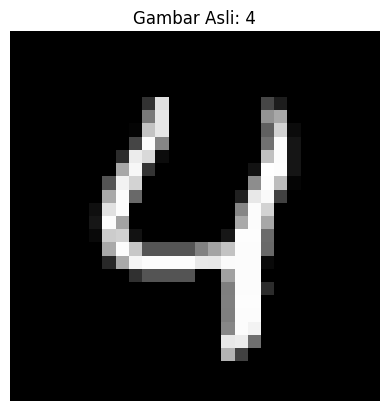

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
===== Prediksi Model =====
Angka 0: 0.0%
Angka 1: 0.0%
Angka 2: 0.0%
Angka 3: 0.0%
Angka 4: 99.98999786376953%
Angka 5: 0.0%
Angka 6: 0.0%
Angka 7: 0.0%
Angka 8: 0.0%
Angka 9: 0.009999999776482582%

Prediksi model: 4 dengan akurasi 99.99%


In [ ]:
import numpy as np



(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_test = x_test.astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

y_test_categorical = tf.keras.utils.to_categorical(y_test, 10)

import os
if os.path.exists('model_mnist.h5'):
    model = tf.keras.models.load_model('model_mnist.h5')
else:
    print("Error:Please make sure the model file exists in the current directory or provide the correct path.")

    exit()

def tampilkan_gambar_dan_prediksi(nomor):
    if nomor < 0 or nomor > 9:
        print("Masukkan angka dari 0 hingga 9")
        return

    idx = np.where(y_test == nomor)[0][0]

    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Gambar Asli: {nomor}")
    plt.axis('off')
    plt.show()

    prediksi = model.predict(np.expand_dims(x_test[idx], axis=0))
    prediksi_persen = np.round(prediksi * 100, 2)
    nilai_sebenarnya = y_test[idx]

    print('===== Prediksi Model =====')
    for i in range(10):
        print(f"Angka {i}: {prediksi_persen[0][i]}%")

    prediksi_angka = np.argmax(prediksi)
    akurasi = prediksi_persen[0][prediksi_angka]

    print(f"\nPrediksi model: {prediksi_angka} dengan akurasi {akurasi:.2f}%")

try:
    nomor_input = int(input("Masukkan angka dari 0 hingga 9: "))
    tampilkan_gambar_dan_prediksi(nomor_input)
except ValueError:
    print("Input tidak valid. Silakan masukkan angka antara 0 sampai 9.")

Setelah user memasukkan angka, sistem akan melakukan prediksi menggunakan model yang sudah dilatih. Berikut adalah langkah-langkah yang diambil:
- Gambar yang sesuai dengan angka pilihan user diambil dari dataset dan divisualisasikan menggunakan matplotlib.
- Model memprediksi gambar tersebut dan menghasilkan probabilitas untuk setiap digit dari 0 hingga 9.
- Probabilitas tersebut dikonversi menjadi persentase dan ditampilkan kepada user untuk memberikan gambaran seberapa yakin model terhadap prediksi tersebut.

Misalnya, jika model memprediksi bahwa gambar tersebut adalah angka 3 dengan akurasi 99%, outputnya akan menampilkan bahwa model yakin 99% bahwa gambar tersebut adalah angka 3, bersama dengan probabilitas untuk setiap angka lainnya.